# OpenCV DNN 모듈을 이용해 Infenece
### 이미지 다운로드

In [1]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

--2021-07-14 12:38:01--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.04s   

2021-07-14 12:38:01 (8.94 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [2]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-07-14 12:38:03--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.02s   

2021-07-14 12:38:03 (4.78 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



### 비디오 다운로드

In [3]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-07-14 12:38:06--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-07-14 12:38:06--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-07-14 12:38:07--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

### Tensorflow Pretrained된 Inference모델과 config파일을 다운로드 받고 이용해 OpenCV에서 모델 생성
-  https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API

In [11]:
!mkdir ./pretrained
!wget -O ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
!wget -O ./pretrained/ssd_config_02.pbtxt https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt

!!tar -xvf ./pretrained/ssd_mobilenet*.tar.gz -C ./pretrained 

mkdir: cannot create directory ‘./pretrained’: File exists
--2021-07-14 12:48:26--  http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.97.128, 2404:6800:4008:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.97.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49318766 (47M) [application/gzip]
Saving to: ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’

./pretrained/ssd_mo 100%[===================>]  47.03M   237MB/s    in 0.2s    

2021-07-14 12:48:26 (237 MB/s) - ‘./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz’ saved [49318766/49318766]

--2021-07-14 12:48:26--  https://gist.githubusercontent.com/dkurt/54a8e8b51beb3bd3f770b79e56927bd7/raw/2a20064a9d33b893dd95d2567da126d0ecd03e85/ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt
Resolving gist.githubusercontent.com (gist.githubusercontent.co

['ssd_mobilenet_v3_large_coco_2020_01_14/pipeline.config',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.index',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.data-00000-of-00001',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.tflite',
 'ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
 'ssd_mobilenet_v3_large_coco_2020_01_14/checkpoint',
 'ssd_mobilenet_v3_large_coco_2020_01_14/model.ckpt.meta',
 'ssd_mobilenet_v3_large_coco_2020_01_14/']

In [9]:
!pwd
!ls -lia ./pretrained/ssd*

/content
4084758 -rw-r--r-- 1 root   root   2668471 Jul 14 12:47 ./pretrained/ssd_config.pbtxt
4084749 -rw-r--r-- 1 root   root  49318766 Jan 15  2020 ./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14.tar.gz

./pretrained/ssd_mobilenet_v3_large_coco_2020_01_14:
total 58848
4087966 drwxr-xr-t 2 382342 89939     4096 Jan 15  2020 .
4087965 drwxr-xr-x 4 root   root      4096 Jul 14 12:47 ..
4084756 -rw-r--r-- 1 382342 89939       77 Jan 15  2020 checkpoint
4084755 -rw-r--r-- 1 382342 89939 13448454 Jan 15  2020 frozen_inference_graph.pb
4084753 -rw-r--r-- 1 382342 89939 26117824 Jan 15  2020 model.ckpt.data-00000-of-00001
4084752 -rw-r--r-- 1 382342 89939    11691 Jan 15  2020 model.ckpt.index
4084757 -rw-r--r-- 1 382342 89939  7623069 Jan 15  2020 model.ckpt.meta
4084754 -rw-r--r-- 1 382342 89939 13027584 Jan 15  2020 model.tflite
4084751 -rw-r--r-- 1 382342 89939     4805 Jan 15  2020 pipeline.config


In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import re

import matplotlib.pyplot as plt

### opencv의 version을 업그레이드 한 경우 cv2.dnn_DetectionModel()을 사용함
- https://github.com/opencv/opencv/pull/16760


In [7]:
print(cv2.__version__)

4.1.2


In [8]:
!pip install opencv-python==4.5.2.54

     |████████████████████████████████| 51.0MB 60kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


### modeling

In [12]:
cv_net = cv2.dnn_DetectionModel('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                                '/content/pretrained/ssd_config_02.pbtxt')

cv_net.setInputSize(320, 320)
cv_net.setInputScale(1.0 / 127.5)
cv_net.setInputMean((127.5, 127.5, 127.5))
cv_net.setInputSwapRB(True)

<dnn_Model 0x7f52423d7cd0>

In [13]:
img = cv2.imread('/content/data/beatles01.jpg')
img_copy = img.copy()

classes, confidences, boxes = cv_net.detect(img, confThreshold=0.5)

In [14]:
classes, confidences, boxes

(array([[1],
        [1],
        [1],
        [1],
        [3],
        [3],
        [3],
        [3],
        [3],
        [3],
        [1]], dtype=int32), array([[0.7795709 ],
        [0.7573837 ],
        [0.75332576],
        [0.71246046],
        [0.6756758 ],
        [0.6396257 ],
        [0.5794208 ],
        [0.5773531 ],
        [0.553491  ],
        [0.5314793 ],
        [0.50632125]], dtype=float32), array([[ 48, 258, 154, 291],
        [213, 252, 158, 298],
        [386, 266, 167, 300],
        [560, 251, 153, 322],
        [496, 226,  80,  67],
        [451, 227,  28,  21],
        [472, 226,  43,  35],
        [375, 219,  17,  17],
        [415, 220,  18,  17],
        [314, 227,  38,  23],
        [258, 259, 101, 268]], dtype=int32))

In [15]:
classes.shape, confidences.shape, boxes.shape

((11, 1), (11, 1), (11, 4))

In [16]:
# label명 지정

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

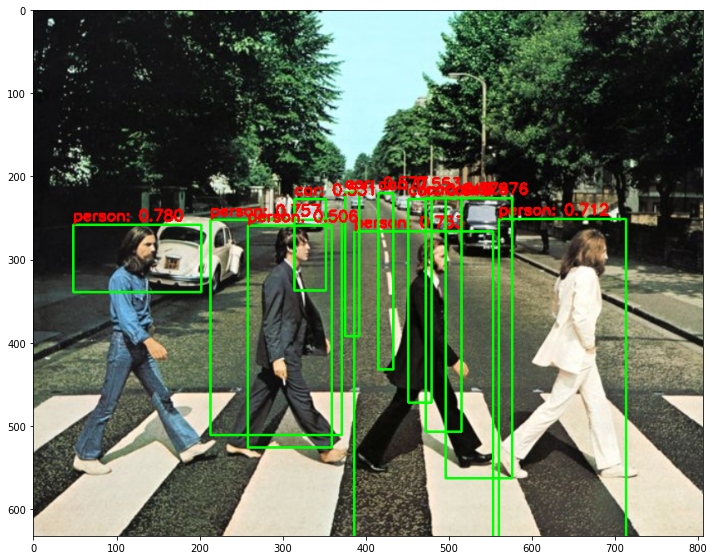

In [19]:
img = cv2.imread('/content/data/beatles01.jpg')
img_copy = img.copy()

classes, confidences, boxes = cv_net.detect(img_copy, confThreshold=0.5)

green_color = (0,255,0)
red_color = (0,0,255)

for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
  if confidence_score>0.5:
    caption = "{}: {:.3f}".format(labels_to_names[class_id], confidence_score)
    cv2.rectangle(img_copy, (box[0], box[1]), (box[0]+box[2], box[0]+box[3]), color=green_color, thickness=2)
    cv2.putText(img_copy, caption, (box[0],box[1]-5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)

draw_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,12))
plt.imshow(draw_img)
plt.show()

In [20]:
import time 
def get_detected_img_renew(cv_net, img_array, score_threshold, is_print=True):
    
  draw_img = img_array.copy()
   
  start = time.time()

  classes, confidences, boxes = cv_net.detect(img_array, confThreshold=0.5)
  
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  # detected 된 object들을 iteration 하면서 정보 추출
  for class_id, confidence_score, box in zip(classes.flatten(), confidences.flatten(), boxes):
    if confidence_score > 0.5:
      caption = "{}: {:.4f}".format(labels_to_names[class_id], confidence_score)
      cv2.rectangle(draw_img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), color=green_color, thickness=2)
      cv2.putText(draw_img, caption, (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.6, red_color, 2)
      print(caption)
  
  if is_print:
      print('Detection 수행시간:',round(time.time() - start, 2),"초")

  return draw_img

In [21]:
# dnn_Model을 만들어주는 함수 생성
def get_cv_detection_model(pretrained_path, config_path):
  cv_net = cv2.dnn_DetectionModel(pretrained_path, config_path)
  cv_net.setInputSize(320, 320)
  cv_net.setInputScale(1.0 / 127.5)
  cv_net.setInputMean((127.5, 127.5, 127.5))
  cv_net.setInputSwapRB(True)

  return cv_net

In [22]:
cv_net = get_cv_detection_model('/content/pretrained/ssd_mobilenet_v3_large_coco_2020_01_14/frozen_inference_graph.pb',
                       '/content/pretrained/ssd_config_02.pbtxt')

person: 0.7796
person: 0.7574
person: 0.7533
person: 0.7125
car: 0.6757
car: 0.6396
car: 0.5794
car: 0.5774
car: 0.5535
car: 0.5315
person: 0.5063
Detection 수행시간: 0.13 초


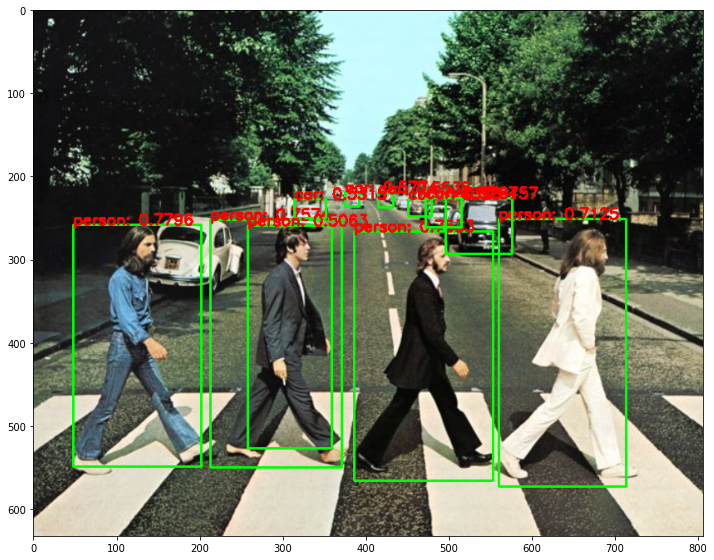

In [26]:
img = cv2.imread('./data/beatles01.jpg')

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img_renew(cv_net, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

person: 0.8579
person: 0.8535
person: 0.8509
baseball glove: 0.6942
sports ball: 0.5895
baseball bat: 0.5015
Detection 수행시간: 0.16 초


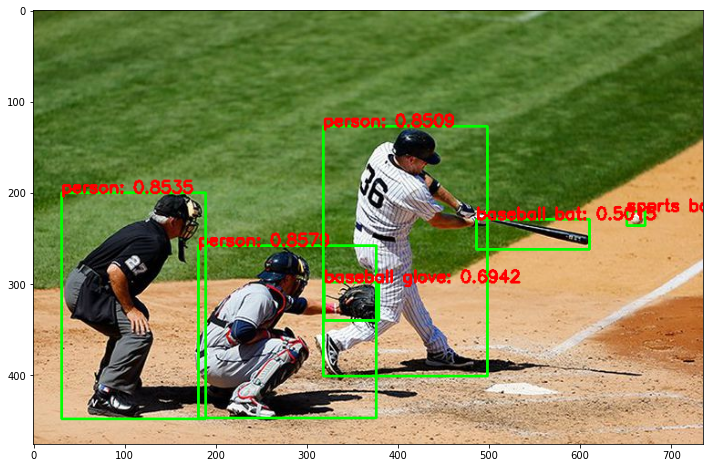

In [27]:
img = cv2.imread('./data/baseball01.jpg')

# Object Detetion 수행 후 시각화 
draw_img = get_detected_img_renew(cv_net, img, score_threshold=0.5,  is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [28]:
def do_detected_video_renew(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt, )

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        returned_frame = get_detected_img_renew(cv_net, img_frame, score_threshold=score_threshold, is_print=True)
        vid_writer.write(returned_frame)

    vid_writer.release()
    cap.release()

In [30]:
do_detected_video_renew(cv_net, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_out1.mp4', 0.2, False)

총 Frame 갯수: 58
car: 0.7007
car: 0.6426
person: 0.6268
car: 0.5965
car: 0.5591
car: 0.5143
car: 0.5111
person: 0.5018
Detection 수행시간: 0.1 초
car: 0.6978
car: 0.6462
person: 0.6340
car: 0.5995
car: 0.5576
car: 0.5123
car: 0.5123
person: 0.5040
Detection 수행시간: 0.12 초
person: 0.7225
car: 0.7070
car: 0.7001
car: 0.5805
car: 0.5615
Detection 수행시간: 0.12 초
person: 0.7266
car: 0.7232
car: 0.6871
car: 0.5425
car: 0.5372
car: 0.5029
Detection 수행시간: 0.12 초
car: 0.6832
car: 0.6009
person: 0.5702
bus: 0.5572
car: 0.5494
truck: 0.5315
Detection 수행시간: 0.11 초
person: 0.6666
car: 0.6634
car: 0.5647
car: 0.5450
bus: 0.5379
car: 0.5267
car: 0.5088
Detection 수행시간: 0.11 초
car: 0.6620
person: 0.6544
car: 0.5694
bus: 0.5468
car: 0.5366
car: 0.5303
car: 0.5074
Detection 수행시간: 0.1 초
car: 0.7102
bus: 0.6212
car: 0.5881
person: 0.5652
car: 0.5506
car: 0.5125
person: 0.5110
Detection 수행시간: 0.13 초
car: 0.6820
car: 0.6173
bus: 0.5815
person: 0.5728
car: 0.5602
Detection 수행시간: 0.1 초
car: 0.6922
car: 0.6200
bus: 0.5714